<a href="https://colab.research.google.com/github/Simon-K-project/final_project/blob/main/Final_project_hr_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


NaN значений нет, можно приступать к анализу данных

In [ ]:
print(df['Work_accident'].unique())
print(df['left'].unique())
print(df['promotion_last_5years'].unique())

[0 1]
[1 0]
[0 1]


numbers:

'satisfaction_level'\
'last_evaluation'\
'number_project'\
'average_montly_hours'\
'time_spend_company'

categories(0/1):

'Work_accident'\
'left'\
'promotion_last_5years'

categories(text/multi):

'department'\
'salary'



##Задание 2

Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

Применим метод .describe() к столбцам \
'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', \
чтобы посмотреть среднее, мин/макс и отклонение

In [8]:
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].describe().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50
std,0.25,0.17,1.23,49.94,1.46
min,0.09,0.36,2.00,96.00,2.00
25%,0.44,0.56,3.00,156.00,3.00
50%,0.64,0.72,4.00,200.00,3.00
75%,0.82,0.87,5.00,245.00,4.00
max,1.00,1.00,7.00,310.00,10.00


In [ ]:
df_slice = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
df_slice

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3
...,...,...,...,...,...
14994,0.40,0.57,2,151,3
14995,0.37,0.48,2,160,3
14996,0.37,0.53,2,143,3
14997,0.11,0.96,6,280,4


Медиана для того же набора столбцов датафрейма

In [ ]:
median_ = df_slice.median()
print(median_)

satisfaction_level        0.64
last_evaluation           0.72
number_project            4.00
average_montly_hours    200.00
time_spend_company        3.00
dtype: float64


Минимальное и максимальное значение для \
'promotion_last_5years', 'left' и 'Work_accident'

In [50]:
min_ = df[['promotion_last_5years', 'left', 'Work_accident']].min()
max_ = df[['promotion_last_5years', 'left', 'Work_accident']].max()
print('Минимальное значение:')
print(min_, '\n')
print('Максимальное значение:')
print(max_)

Минимальное значение:
promotion_last_5years    0
left                     0
Work_accident            0
dtype: int64 

Максимальное значение:
promotion_last_5years    1
left                     1
Work_accident            1
dtype: int64


Узнаем моду для всего датафрейма

In [19]:
df.mode().iloc[:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


Почему разное количество строчек в результате?

'average_montly_hours' с ним добавляется вторая строка

In [53]:
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.1,0.55,4.0,135,3.0
1,NaN,NaN,NaN,156,NaN


In [54]:
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].mode()[0]

KeyError: ignored

In [ ]:
print(df[['department', 'salary']].mode())

  department salary
0      sales    low


##Задание 3

Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.\
Определите две самые скоррелированные и две наименее
скоррелированные переменные.


In [ ]:
df_slice.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<Axes: >

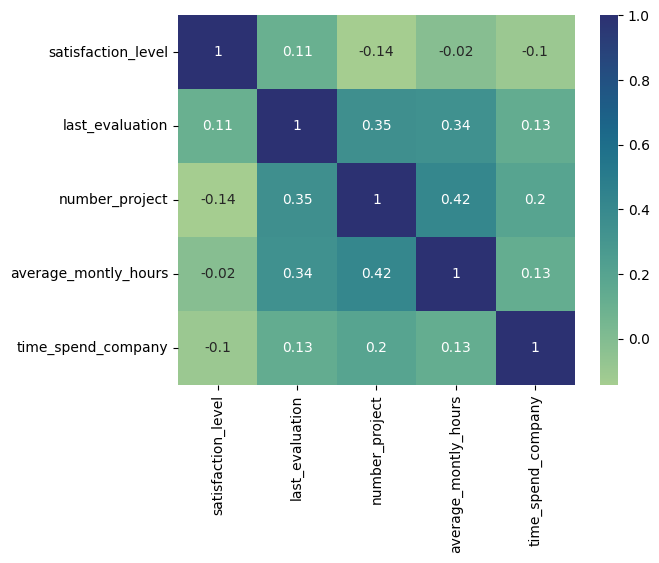

In [ ]:
sns.heatmap(df_slice.corr(), annot=True, cmap='crest')

Две самые скоррелированные переменные:

**average_montly_hours** и **number_project**\
Коэффициент корреляции составляет 0.42.\
Что меньше 0.5, значит взаимосвязь слабая

Две наименее скоррелированные переменные:

**average_montly_hours** и **satisfaction_level**\
Коэффициент корреляции составляет -0.02.

##Задание 4

Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [ ]:
df['department'].groupby(df['department']).count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

##Задание 5
Показать распределение сотрудников по зарплатам.

In [ ]:
df['salary'].groupby(df['salary']).count()

salary
high      1237
low       7316
medium    6446
Name: salary, dtype: int64

kind='hist' не подошёл

<Axes: title={'center': 'Распределение сотрудников по зарплатам'}, ylabel='Frequency'>

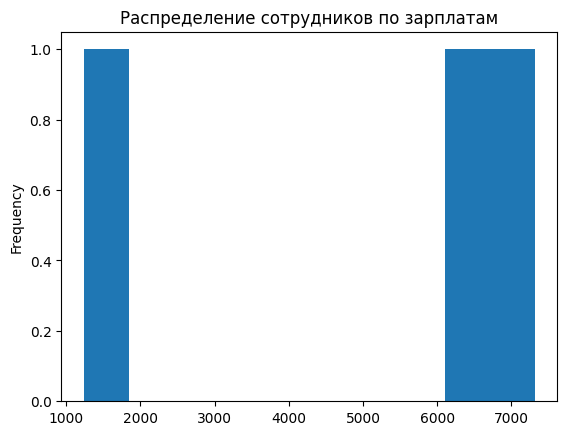

In [ ]:
df['salary'].groupby(df['salary']).count().plot(kind='hist',
                  title='Распределение сотрудников по зарплатам')

Распределение сотрудников по зарплатам

<Axes: xlabel='salary', ylabel='count'>

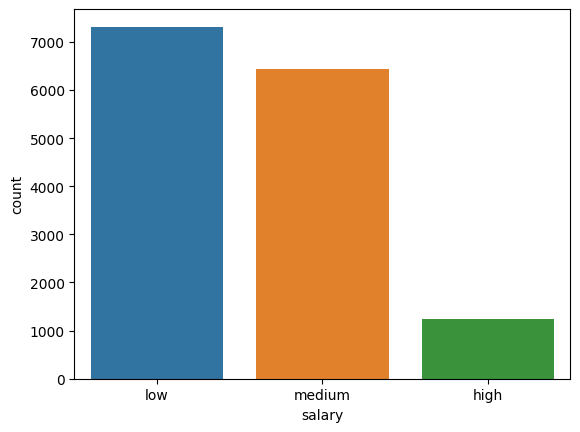

In [ ]:
sns.countplot(x='salary', data=df)

<Axes: title={'center': 'Распределение сотрудников по зарплатам'}, xlabel='Категория зарплаты', ylabel='Количество сотрудников'>

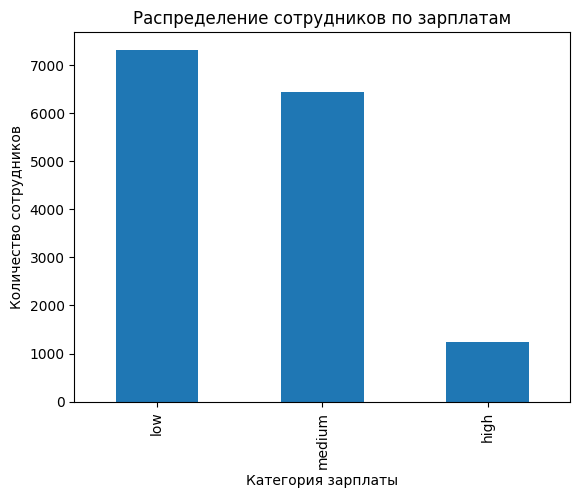

In [ ]:
df['salary'].value_counts().plot(kind='bar',
                  title='Распределение сотрудников по зарплатам',
                  xlabel='Категория зарплаты',
                  ylabel='Количество сотрудников')

##Задание 6

Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

In [58]:
df[['department', 'salary']].groupby(['department', 'salary']).agg({'salary':['count']}).reset_index().reset_index()

index   department  salary      
                              count
0      0           IT    high    83
1      1           IT     low   609
2      2           IT  medium   535
3      3        RandD    high    51
4      4        RandD     low   364
5      5        RandD  medium   372
6      6   accounting    high    74
7      7   accounting     low   358
8      8   accounting  medium   335
9      9           hr    high    45
10    10           hr     low   335
11    11           hr  medium   359
12    12   management    high   225
13    13   management     low   180
14    14   management  medium   225
15    15    marketing    high    80
16    16    marketing     low   402
17    17    marketing  medium   376
18    18  product_mng    high    68
19    19  product_mng     low   451
20    20  product_mng  medium   383
21    21        sales    high   269
22    22        sales     low  2099
23    23        sales  medium  1772
24    24      support    high   141
25    25      support     low  1146
26    26      support  medium   942
27    27    technical    high   201
28    28    technical     low  1372
29    29    technical  medium  1147

<Axes: title={'center': 'Распределение сотрудников по зарплатам в каждом департаменте по отдельности'}, xlabel='department,salary'>

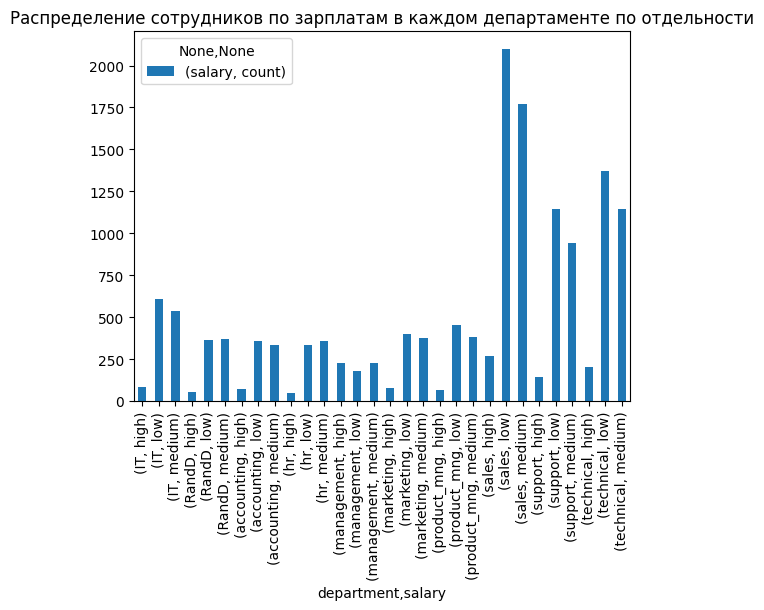

In [61]:
df[['department', 'salary']].groupby(['department', 'salary']).agg({'salary':['count']}).plot(kind='bar',
                                                                                              title='Распределение сотрудников по зарплатам в каждом департаменте по отдельности')

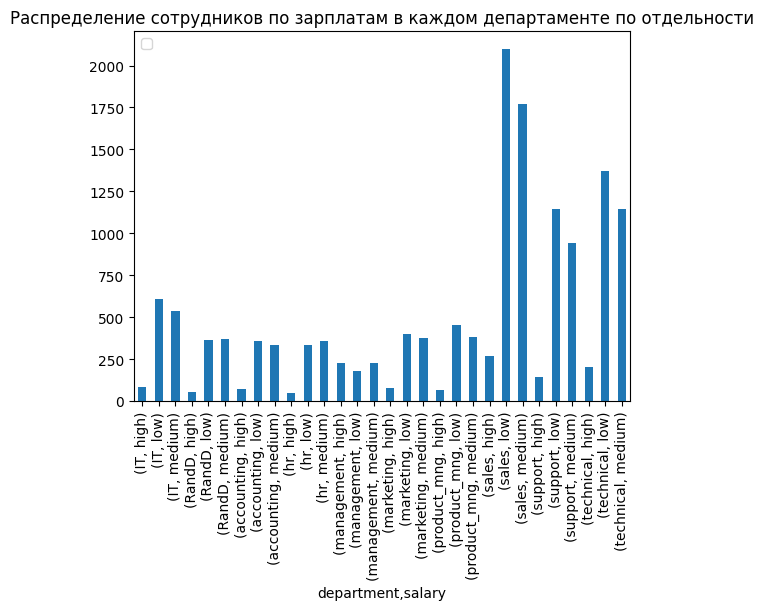

In [ ]:
df[['department', 'salary']].groupby(['department', 'salary']).value_counts().plot(kind='bar',
                                                    title='Распределение сотрудников по зарплатам в каждом департаменте по отдельности')
plt.legend(loc='upper left')

<Axes: xlabel='department,salary'>

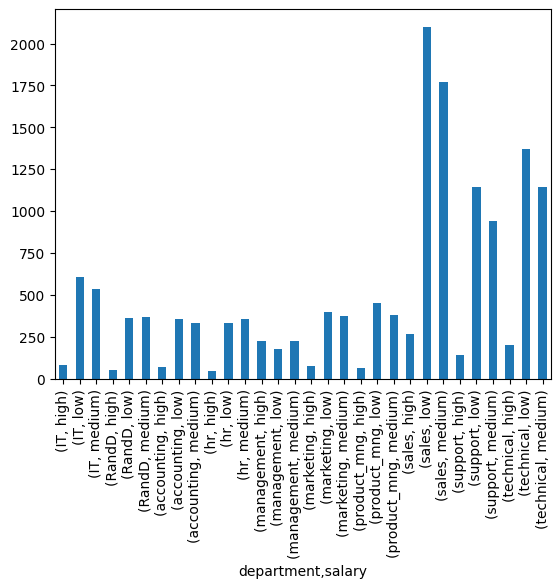

In [ ]:
df[['department', 'salary']].groupby(['department', 'salary']).value_counts().plot(kind='bar', x='department', stacked=True)

In [ ]:
sns.pairplot(df)

In [ ]:
sns.pairplot(df_slice)

##Задание 7

Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [62]:
time_salary_high = df.loc[df['salary']=='high']['average_montly_hours']

In [63]:
time_salary_low = df.loc[df['salary']=='low']['average_montly_hours']

Посмотрим наложение распределений двух выборок

<Axes: ylabel='Frequency'>

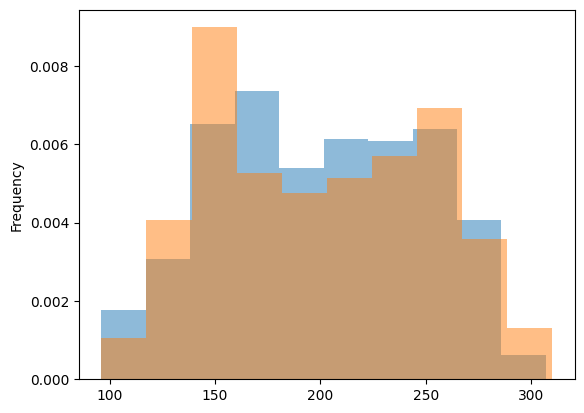

In [64]:
time_salary_high.plot(kind='hist',
                      alpha=0.5,
                      density=True)
time_salary_low.plot(kind='hist',
                     alpha=0.5,
                     density=True)

Применим параметрический тест Стьюдента. По графику видно, что распределение не нормальное, но не будем это считать фактором для отказа от применения данного теста.

In [65]:
stat, p = st.ttest_ind(time_salary_high, time_salary_low)

if p < 0.05:
  print('Отклоняем нулевую гипотезу, средние, вероятно, разные')
else:
  print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')

Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


Т-тест показал, что нулевую гипотезу не отклоняем. А это значит, что выборки, вероятно, не имеют статистически значимых различий.

Оклад не влияет на время проведённое на работе.

##Задание 8

Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет \
● Средняя степень удовлетворенности\
● Среднее количество проектов

left - 1 - True\
left - 0 - False

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [70]:
def calculated_indicators(df):
  list_bool = [1, 0]
  for i in list_bool:
    if i == 1:
      print('Показатели среди уволившихся сотрудников:', '\n')
    else:
      print('Показатели среди не уволившихся сотрудников:', '\n')
    left_count = df.loc[df['left']==i].count()[0]
    promotion_left_count = df.loc[(df['left']==i) & (df['promotion_last_5years']==i)].count()[0]
    ratio = promotion_left_count / left_count
    satisfaction_mean = df['satisfaction_level'].loc[df['left']==i].mean()
    projects_mean = df['number_project'].loc[df['left']==i].mean()

    print(f'Доля сотрудников с повышением за последние 5 лет: {round(ratio, 3)} | {round(ratio*100, 1)} %')
    print(f'Средняя степень удовлетворенности {round(satisfaction_mean, 3)}')
    print(f'Среднее количество проектов {round(projects_mean, 3)}', '\n')

calculated_indicators(df)

Показатели среди уволившихся сотрудников: 

Доля сотрудников с повышением за последние 5 лет: 0.005 | 0.5 %
Средняя степень удовлетворенности 0.44
Среднее количество проектов 3.856 

Показатели среди не уволившихся сотрудников: 

Доля сотрудников с повышением за последние 5 лет: 0.974 | 97.4 %
Средняя степень удовлетворенности 0.667
Среднее количество проектов 3.787 



In [ ]:
tt = df.loc[(df['left']==1) & (df['promotion_last_5years']==1)].count()[0]
tf = df.loc[(df['left']==1) & (df['promotion_last_5years']==0)].count()[0]
ft = df.loc[(df['left']==0) & (df['promotion_last_5years']==1)].count()[0]
ff = df.loc[(df['left']==0) & (df['promotion_last_5years']==0)].count()[0]
tt+tf+ft+ff

14999

In [71]:
left_count = df.loc[df['left']==1].count()[0]
promotion_left_count = df.loc[(df['left']==1) & (df['promotion_last_5years']==1)].count()[0]
ratio = promotion_left_count / left_count
satisfaction_mean = df['satisfaction_level'].loc[df['left']==1].mean()
projects_mean = df['number_project'].loc[df['left']==1].mean()
print(left_count, promotion_left_count, round(ratio, 3), '\n',
      round(satisfaction_mean, 3), round(projects_mean, 3))

3571 19 0.005 
 0.44 3.856


In [ ]:
df.apply(calculated_indicators, axis=1)

## Задание 9

Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary).

Оценить качество модели на тестовой выборки.

In [ ]:
df.head(0)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


In [82]:
df_lda = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
df_lda.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [83]:
data_class = df['left']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df_lda, data_class, random_state=42)

In [76]:
y_train

14480    1
1934     1
7900     0
2952     0
4367     0
        ..
5191     0
13418    0
5390     0
860      1
7270     0
Name: left, Length: 11249, dtype: int64

In [91]:
lda = LinearDiscriminantAnalysis()

In [92]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [93]:
y_pred = lda.predict(X_test)

В качестве метрики качества возьмём точность. Она составила 75.4 %. \
Получается что одна четвёртная часть неверна

In [94]:
accuracy_score(y_test, lda.predict(X_test))

0.7536

classification_report

Здесь видим, что в тестовой выборке всего 3750 сотрудников, из которых 2853 не уволились, а 897 уволились.

Модель предсказала увольнение 47 % сотрудников (тут не совсем уверен в правильности трактовки результатов)

Из числа фактически уволившихся сотрудников, модель правильно предсказала такой результат только для 25 % сотрудников.

Оценка f1 = 0.32. Значение не близко к 1, значит можно сказать, что модель предсказывает недостаточно точно

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2853
           1       0.47      0.25      0.32       897

    accuracy                           0.75      3750
   macro avg       0.63      0.58      0.59      3750
weighted avg       0.72      0.75      0.72      3750



По результатам оценки качества модели можно сказать, что некоторая правильность в модели есть, но эффективность не так высока, чтобы можно было безоговорочно на неё полагаться.

Возможно применение другой модели, например, logistic regression, приведёт к изменению результата в лучшую сторону.

В данном анализе не использовалась salary, возможно, в рамках трудоустройства, этот показатель мог бы расширить понимание влияния признаков на исход.